A regression analysis has been conducted on the birthweight_low dataset. The regression analysis includes different models 
such as StatsModel, OLS, ARD, and Lasso. The Y-variable is bwght. X-Variables have been eliminated based on R-Squared and P-Values
to find the variables that will create the best model. After the data was split into training and testing to see how the variables 
perform. The final R-Squared is 0.771 and it is in the lm.best model. The best model is put into a dynamic print string at the end. 

In [1]:
#Importing the libraries and dataset
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.formula.api as smf #Library needed
from sklearn.model_selection import train_test_split #Library needed for train/test split
from sklearn.linear_model import LinearRegression #Scikit-learn library for Linear Regression

# Printing options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


#This file is in the downloads file on the computer
file = './birthweight_low.xlsx'


#Bringing the data from excel into Python
birthweight = pd.read_excel(io = file,
                       header = 0,
                       sheet_name = 0)

In [2]:
#Understanding the variables
birthweight.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,352.000000,349.000000,352.000000,349.000000,352.000000,345.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,38.928977,13.541547,2.017045,13.530086,40.602273,13.582609,7.954545,8.880682,10.761364,5.528409,0.545455,0.332386,0.363636,0.303977,0.397727,0.329545,0.272727,3246.088068
std,10.363373,2.289812,0.337148,6.323404,12.210210,2.965840,2.024967,0.793472,6.945444,3.865147,0.498638,0.471739,0.481730,0.460628,0.490125,0.470717,0.445996,757.704391
min,21.000000,0.000000,1.000000,2.000000,19.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000
25%,32.000000,12.000000,2.000000,10.000000,31.750000,12.000000,8.000000,9.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2867.750000
50%,37.000000,13.000000,2.000000,12.000000,39.000000,14.000000,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3349.000000
75%,45.000000,16.000000,2.000000,16.000000,47.250000,16.000000,9.000000,9.000000,16.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3778.750000
max,73.000000,18.000000,7.000000,42.000000,72.000000,19.000000,10.000000,10.000000,32.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000


In [3]:
#Understanding what type the variables are
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    352 non-null    int64  
 1   meduc   349 non-null    float64
 2   monpre  352 non-null    int64  
 3   npvis   349 non-null    float64
 4   fage    352 non-null    int64  
 5   feduc   345 non-null    float64
 6   omaps   352 non-null    int64  
 7   fmaps   352 non-null    int64  
 8   cigs    352 non-null    int64  
 9   drink   352 non-null    int64  
 10  male    352 non-null    int64  
 11  mwhte   352 non-null    int64  
 12  mblck   352 non-null    int64  
 13  moth    352 non-null    int64  
 14  fwhte   352 non-null    int64  
 15  fblck   352 non-null    int64  
 16  foth    352 non-null    int64  
 17  bwght   352 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 49.6 KB


Continuous variables: bwght,meduc,monpre,npvis,feduc,omaps,cigs,drink,fage,mage

Categorical: male mwhte mblck moth fwhte fblck foth

Since omaps and fmaps are outside the event horizon, these 2 variables can't be used.

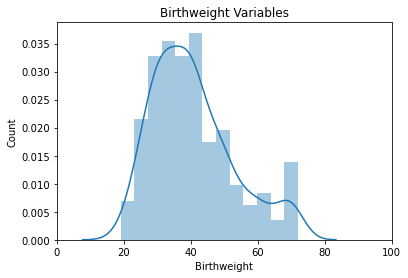

In [4]:
#To understand the variables better, a distplot is created to see the distribution
#Variables can be changed inside the birthweight 
sns.distplot(a   = birthweight['fage'],
          kde    = True)


#Title and Labels
plt.title(label   = "Birthweight Variables")
plt.xlabel(xlabel = "Birthweight") 
plt.ylabel(ylabel = "Count")
plt.xlim(0, 100) #This can be changed according to how small/large the variables are

#This will display the distplot
plt.show()

In [5]:
#Transforming the variables that are skewed to logs. 
#The distplot above helped us figure out which variables were skewed
#Birthweight was skewed
birthweight['log_bwght'] = np.log(birthweight['bwght'])

#Npvis was skewed to the left
birthweight['log_npvis'] = np.log(birthweight['npvis'])

In [6]:
#Checking for null values
birthweight.isnull().sum(axis = 0)

mage         0
meduc        3
monpre       0
npvis        3
fage         0
feduc        7
omaps        0
fmaps        0
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
bwght        0
log_bwght    0
log_npvis    3
dtype: int64

In [7]:
#Loop to check for missing variables
for col in birthweight:

    #1 for missing variables and 0 for not missing
    if birthweight[col].isnull().astype(int).sum() > 0:
        birthweight['m_'+col] = birthweight[col].isnull().astype(int)


#Checking the results
birthweight[  ['m_meduc', 'm_feduc',
             'm_npvis']    ].sum(axis = 0)

#Creating this so correct variables get dropped
df_dropped = birthweight.dropna()

In [8]:
#Replacing the missing values so they don't show as null
fill = 0

birthweight['meduc'] = birthweight['meduc'].fillna(value = fill)

birthweight['feduc'] = birthweight['feduc'].fillna(value = fill)

birthweight['npvis'] = birthweight['npvis'].fillna(value = fill)

birthweight['log_npvis'] = birthweight['log_npvis'].fillna(value = fill)


In [9]:
#Understanding how variables are correlated with each other
#This will help build the regression model
birthweight.corr(method = 'pearson').round(decimals = 2)

#Some noticeably correlations:
#Fage and mage: 0.68, Fage and cigs: 0.44, Fage and drink: 0.53
#Drink and mage: 0.45

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght,log_npvis,m_meduc,m_npvis,m_feduc,m_log_npvis
mage,1.00,-0.11,-0.07,-0.27,0.68,-0.05,-0.23,-0.33,0.38,0.45,-0.02,0.01,-0.04,0.04,-0.05,-0.02,0.08,-0.48,-0.49,-0.26,0.05,-0.04,-0.00,-0.04
meduc,-0.11,1.00,-0.01,0.21,-0.15,0.52,0.25,0.18,-0.03,-0.14,-0.07,-0.17,-0.13,0.31,-0.11,-0.17,0.30,0.21,0.27,0.31,-0.48,-0.16,-0.22,-0.16
monpre,-0.07,-0.01,1.00,-0.03,0.03,-0.16,0.01,-0.00,-0.08,-0.01,0.03,-0.04,0.08,-0.05,0.03,0.04,-0.07,0.02,0.02,-0.02,-0.00,-0.00,0.29,-0.00
npvis,-0.27,0.21,-0.03,1.00,-0.22,0.13,0.20,0.16,-0.03,-0.16,0.01,-0.03,-0.04,0.07,0.00,-0.05,0.05,0.28,0.29,0.92,-0.14,-0.19,-0.13,-0.19
fage,0.68,-0.15,0.03,-0.22,1.00,-0.16,-0.38,-0.46,0.44,0.53,0.06,-0.03,0.03,-0.00,-0.10,0.09,0.01,-0.58,-0.62,-0.28,0.07,0.00,0.04,0.00
feduc,-0.05,0.52,-0.16,0.13,-0.16,1.00,0.29,0.19,-0.04,-0.10,0.00,-0.22,-0.20,0.43,-0.22,-0.06,0.31,0.19,0.24,0.18,-0.20,0.07,-0.54,0.07
omaps,-0.23,0.25,0.01,0.20,-0.38,0.29,1.00,0.59,-0.30,-0.38,-0.05,-0.19,-0.00,0.20,-0.13,-0.02,0.16,0.45,0.51,0.26,-0.07,0.02,-0.08,0.02
fmaps,-0.33,0.18,-0.00,0.16,-0.46,0.19,0.59,1.00,-0.31,-0.35,-0.17,-0.05,-0.08,0.13,-0.02,-0.08,0.10,0.46,0.54,0.17,-0.06,0.01,-0.08,0.01
cigs,0.38,-0.03,-0.08,-0.03,0.44,-0.04,-0.30,-0.31,1.00,0.56,0.01,-0.06,-0.06,0.12,-0.10,-0.06,0.17,-0.57,-0.58,-0.09,0.03,0.05,-0.02,0.05
drink,0.45,-0.14,-0.01,-0.16,0.53,-0.10,-0.38,-0.35,0.56,1.00,0.00,0.03,0.03,-0.07,-0.02,0.04,-0.02,-0.67,-0.65,-0.19,0.06,-0.02,-0.04,-0.02


In [10]:
#Leaving this import in here incase it needs to run again
#import statsmodels.formula.api as smf 

#Step 1: Trying to see which variables are working with log_bwght
#Variables can be added and removed 
lm_practice = smf.ols(formula = """log_bwght ~ fage
                                """,
                  data = birthweight)

# Step 2: The data will be fitting in the model
results = lm_practice.fit()


# Step 3: Model with the OLS Regression Summary will be printed
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           8.34e-39
Time:                        15:41:25   Log-Likelihood:                 24.980
No. Observations:                 352   AIC:                            -45.96
Df Residuals:                     350   BIC:                            -38.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6435      0.042    206.343      0.0

In [11]:
#Since Fage and Cigs were highly correlated, a new variable was created for this.
#The father's age and the amount of cigarettes can affect the child's birthweight
#If the father is a heavy smoker then this reduce the child's birthweight
birthweight['fcigs'] = birthweight['fage'] * birthweight['cigs']

#The older the father is and the more the father drinks can change the birthweight
birthweight['fdrink'] = birthweight['fage'] * birthweight['drink']

#If both parents drink heavily then the child's birthweight will change.
#The mage and fage are mulitplied together because we want to see how the birthweight changes when 
#both parents drink.
birthweight['mfdrink'] = (birthweight['mage'] * birthweight['fage']) + birthweight['drink']

#The theory is similar to mfdrink. If both parents smoke cigarettes then the child's birthweight will change. 
#The child may be more at risk of having a lower birthweight because both parents are smokers.
birthweight['mfcigs'] = (birthweight['mage'] * birthweight['fage']) + birthweight['cigs']

#If the mother is a smoker during pregnancy then this can increase complications for the child.
birthweight['mcigs'] = birthweight['mage'] * birthweight['cigs']

#If the mother drinks during the pregnancy then the child is at risk of 
#having a not normal birthweight.
birthweight['mdrink'] = birthweight['mage'] * birthweight['drink']

In [12]:
#Running the correlation matrix again to understand how correlated the new variables are
birthweight.corr(method = 'pearson').round(decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght,log_npvis,m_meduc,m_npvis,m_feduc,m_log_npvis,fcigs,fdrink,mfdrink,mfcigs,mcigs,mdrink
mage,1.00,-0.11,-0.07,-0.27,0.68,-0.05,-0.23,-0.33,0.38,0.45,-0.02,0.01,-0.04,0.04,-0.05,-0.02,0.08,-0.48,-0.49,-0.26,0.05,-0.04,-0.00,-0.04,0.54,0.58,0.90,0.90,0.64,0.69
meduc,-0.11,1.00,-0.01,0.21,-0.15,0.52,0.25,0.18,-0.03,-0.14,-0.07,-0.17,-0.13,0.31,-0.11,-0.17,0.30,0.21,0.27,0.31,-0.48,-0.16,-0.22,-0.16,-0.13,-0.19,-0.16,-0.16,-0.11,-0.17
monpre,-0.07,-0.01,1.00,-0.03,0.03,-0.16,0.01,-0.00,-0.08,-0.01,0.03,-0.04,0.08,-0.05,0.03,0.04,-0.07,0.02,0.02,-0.02,-0.00,-0.00,0.29,-0.00,-0.05,-0.01,-0.03,-0.03,-0.06,-0.03
npvis,-0.27,0.21,-0.03,1.00,-0.22,0.13,0.20,0.16,-0.03,-0.16,0.01,-0.03,-0.04,0.07,0.00,-0.05,0.05,0.28,0.29,0.92,-0.14,-0.19,-0.13,-0.19,-0.15,-0.25,-0.27,-0.27,-0.14,-0.24
fage,0.68,-0.15,0.03,-0.22,1.00,-0.16,-0.38,-0.46,0.44,0.53,0.06,-0.03,0.03,-0.00,-0.10,0.09,0.01,-0.58,-0.62,-0.28,0.07,0.00,0.04,0.00,0.72,0.77,0.91,0.91,0.60,0.68
feduc,-0.05,0.52,-0.16,0.13,-0.16,1.00,0.29,0.19,-0.04,-0.10,0.00,-0.22,-0.20,0.43,-0.22,-0.06,0.31,0.19,0.24,0.18,-0.20,0.07,-0.54,0.07,-0.13,-0.16,-0.13,-0.13,-0.08,-0.12
omaps,-0.23,0.25,0.01,0.20,-0.38,0.29,1.00,0.59,-0.30,-0.38,-0.05,-0.19,-0.00,0.20,-0.13,-0.02,0.16,0.45,0.51,0.26,-0.07,0.02,-0.08,0.02,-0.43,-0.48,-0.35,-0.35,-0.36,-0.41
fmaps,-0.33,0.18,-0.00,0.16,-0.46,0.19,0.59,1.00,-0.31,-0.35,-0.17,-0.05,-0.08,0.13,-0.02,-0.08,0.10,0.46,0.54,0.17,-0.06,0.01,-0.08,0.01,-0.51,-0.49,-0.46,-0.46,-0.45,-0.45
cigs,0.38,-0.03,-0.08,-0.03,0.44,-0.04,-0.30,-0.31,1.00,0.56,0.01,-0.06,-0.06,0.12,-0.10,-0.06,0.17,-0.57,-0.58,-0.09,0.03,0.05,-0.02,0.05,0.90,0.57,0.43,0.44,0.92,0.56
drink,0.45,-0.14,-0.01,-0.16,0.53,-0.10,-0.38,-0.35,0.56,1.00,0.00,0.03,0.03,-0.07,-0.02,0.04,-0.02,-0.67,-0.65,-0.19,0.06,-0.02,-0.04,-0.02,0.62,0.92,0.53,0.53,0.59,0.94


In [13]:
#Adding in more variables

#Step 1: Trying to see which variables are working with log_bwght
#Variables can be added and removed 
lm_practice = smf.ols(formula = """log_bwght ~ fage + cigs + drink +
                                 mwhte + mblck + moth + 
                                fwhte + fblck + foth  +
                                npvis + fcigs + mfdrink + mfcigs
                                """,
                  data = birthweight)

# Step 2: The data will be fitting in the model
results = lm_practice.fit()


# Step 3: Model with the OLS Regression Summary will be printed
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     107.4
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           5.58e-99
Time:                        15:41:31   Log-Likelihood:                 189.90
No. Observations:                 352   AIC:                            -357.8
Df Residuals:                     341   BIC:                            -315.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7678      0.032    147.812      0.0

In [14]:
#Creating placeholder values for variables to see if regression model becomes better
birthweight['has_npvis']     = 0

# looping through these values and creating a new features column
for index, column in birthweight.iterrows():

    #Look in this column but change it to this     
    if birthweight.loc[index, "log_npvis"] > 0:
        birthweight.loc[index, 'has_npvis'] = 1

In [15]:
#After running the regression model and finding X variables that are best for the model.
#Getting rid of all y data and whatever we think is toxic/harmful to data
birthweight_data   = birthweight.drop(['bwght', #Removing the Y variable
                                       'log_bwght', #Remvoving the Y Variable
                                       'male', #Removing male because it is a categorical variable and isn't well correlated with birthweight
                                       'log_npvis', #Removing log_npvis because npvis is better correlated  
                                       'mcigs'#Removing this variable because it affects fage and cigs
                                      ],
                               axis = 1)

#Preparing the Y Variables
birthweight_target = birthweight.loc[ : , 'bwght']
log_birthweight_target = birthweight.loc[ : , 'log_bwght']


#Creating the training and test set
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,        #X Variables
            log_birthweight_target,      #Y variables
            test_size = 0.25,    #Size of the test set
            random_state = 219) 

#Checking the shape of our train model
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (264, 26)
y-side: (264,)


Testing Data
------------
X-side: (88, 26)
y-side: (88,)



In [16]:
#Choosing the best X variables from practice regression models to create the test/train models
x_variables = ['mage','npvis', 'fage', 'mwhte', 'mblck', 'moth',
               'fwhte', 'fblck' , 'foth', 'fcigs','mfdrink','mfcigs']

In [17]:
#Incase this library needs to be run again for regression
import statsmodels.formula.api as smf

#Merging X and Y train for the Statsmodel
birthweight_train = pd.concat([x_train, y_train], axis = 1)

#Step 1: Building the best model - This is done after running practice regressions
lm_best = smf.ols(formula = """log_bwght ~ mage +
                                           npvis +
                                           fage +
                                           mwhte +
                                           mblck +
                                           moth +
                                           fwhte +
                                           fblck +
                                           foth +
                                           fcigs +
                                           mfdrink +
                                           mfcigs
                            """,
                                data = birthweight_train) #Only training data is used for this

#Step 2: Fitting the best model
results = lm_best.fit()



#Step 3: Printing the best OLS Regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     85.34
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           3.58e-75
Time:                        15:41:39   Log-Likelihood:                 152.27
No. Observations:                 264   AIC:                            -282.5
Df Residuals:                     253   BIC:                            -243.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3005      0.084     51.132      0.0

In [18]:
#Using x-variables from the OLS model to use in models for scikit-learn
ols_data = birthweight.loc[:, x_variables]


#Creating the Y variable which will be log_bwght
log_birthweight_target = birthweight.loc[: , 'log_bwght']


#Creating the training and testing set
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,     #x-variables
            log_birthweight_target,   # y-variable
            test_size = 0.25, #Test size
            random_state = 219)

In [19]:
#Creating the Linear Regression Model
lr = LinearRegression()

#Fitting the model to the training data
lr_fit = lr.fit(x_train, y_train)

#Testing the data to see how it works
lr_pred = lr_fit.predict(x_test)


#Printing the scores of how the data works
print('OLS Training Score :', lr.score(x_train, y_train).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test, y_test).round(4)) # using R-square

#Creating new variables for the train/test gap
lr_train_score = lr.score(x_train, y_train).round(4)
lr_test_score = lr.score(x_test, y_test).round(4)

#Printing the gap in absolute value. We want the gap to be lower than 0.05
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7974
OLS Testing Score  : 0.7315
OLS Train-Test Gap : 0.0659


In [20]:
#Zipping up the best features used to the coefficients
lr_model_values = zip(birthweight_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# Storing model features used
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


#Printing the features
for val in lr_model_values:
    lr_model_lst.append(val)
    

#Printing the results
for pair in lr_model_lst:
    print(pair)

('intercept', 7.16)
('mage', 0.02)
('npvis', -0.01)
('fage', 0.01)
('mwhte', 0.01)
('mblck', 0.03)
('moth', 0.01)
('fwhte', 0.01)
('fblck', -0.01)
('foth', 0.0)
('fcigs', -0.02)
('mfdrink', 0.02)
('mfcigs', -0.05)


In [21]:
#Library to import the linear models
import sklearn.linear_model 

#Creating the Lasso Model
lasso_model = sklearn.linear_model.Lasso(alpha = 1,
                                         normalize = True) # default magitude


#Pulling in and fitting the training data
lasso_fit = lasso_model.fit(x_train, y_train)


#Seeing how the testing data performs
lasso_pred = lasso_fit.predict(x_test)


#Printing training and testing scores
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))


#Creating a new variable for the score
lasso_train_score = lasso_model.score(x_train, y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   # using R-square

#Printing the train/test gap in absolute values
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.0
Lasso Testing Score  : -0.0002
Lasso Train-Test Gap : 0.0002


In [22]:
#Zipping up the best features used to the coefficients
lasso_model_values = zip(birthweight_data.columns, lasso_fit.coef_.round(decimals = 2))


#Storing model features used
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


#Printing the features
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

#Printing the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 8.05)
('mage', -0.0)
('meduc', 0.0)
('monpre', 0.0)
('npvis', 0.0)
('fage', -0.0)
('feduc', 0.0)
('omaps', 0.0)
('fmaps', 0.0)
('cigs', -0.0)
('drink', -0.0)
('mwhte', -0.0)
('mblck', 0.0)
('moth', 0.0)
('fwhte', -0.0)
('fblck', 0.0)
('foth', 0.0)
('m_meduc', -0.0)
('m_npvis', 0.0)
('m_feduc', -0.0)
('m_log_npvis', 0.0)
('fcigs', -0.0)
('fdrink', -0.0)
('mfdrink', -0.0)
('mfcigs', -0.0)
('mdrink', -0.0)
('has_npvis', -0.0)


In [23]:
#For the coefficents in birthweight which are not zero from the above, they will be dropped
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
#Printing out the remaining coefficients
for pair in lasso_model_lst:
    print(pair)

('intercept', 8.05)
('meduc', 0.0)
('npvis', 0.0)
('feduc', 0.0)
('fmaps', 0.0)
('drink', -0.0)
('mblck', 0.0)
('fwhte', -0.0)
('foth', 0.0)
('m_npvis', 0.0)
('m_log_npvis', 0.0)
('fdrink', -0.0)
('mfcigs', -0.0)
('has_npvis', -0.0)


In [24]:
#Creating the ARD model
ard_model = sklearn.linear_model.ARDRegression()

#Pulling in and fitting the training data
ard_fit = ard_model.fit(x_train, y_train)


#Seeing how the testing data performs
ard_pred = ard_fit.predict(x_test)

#Printing training and testing scores
print('Training Score:', ard_model.score(x_train, y_train).round(4))
print('Testing Score :', ard_model.score(x_test, y_test).round(4))


#Creating a new variable for the score
ard_train_score = ard_model.score(x_train, y_train).round(4)
ard_test_score  = ard_model.score(x_test, y_test).round(4)


#Printing the train/test gap in absolute values
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)


Training Score: 0.7328
Testing Score : 0.6323
ARD Train-Test Gap : 0.1005


In [25]:
#Zipping up the best features used to the coefficients
ard_model_values = zip(birthweight.columns, ard_fit.coef_.round(decimals = 5))


#Storing model features used
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


#Printing the features
for val in ard_model_values:
    ard_model_lst.append(val)
    

#Printing the results
for pair in ard_model_lst:
    print(pair)

('intercept', 6.93)
('mage', 0.03637)
('meduc', 0.0)
('monpre', 0.0)
('npvis', 0.0)
('fage', 0.03018)
('feduc', 0.0)
('omaps', 0.02153)
('fmaps', 0.0)
('cigs', 0.0)
('drink', -0.02752)
('male', 0.0)
('mwhte', 0.0)
('mblck', 0.0)
('moth', -0.0209)
('fwhte', 0.0)
('fblck', 0.0)
('foth', -0.16949)
('bwght', 0.04078)
('log_bwght', 0.0)
('log_npvis', 0.04078)
('m_meduc', 0.0)
('m_npvis', 0.0)
('m_feduc', 0.0105)
('m_log_npvis', -0.01136)
('fcigs', 0.0)
('fdrink', -0.04078)


In [26]:
#For the coefficents in birthweight which are not zero from the above, they will be dropped
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
#Printing out the remaining coefficients
for pair in ard_model_lst:
    print(pair)

('intercept', 6.93)
('mage', 0.03637)
('monpre', 0.0)
('fage', 0.03018)
('omaps', 0.02153)
('cigs', 0.0)
('drink', -0.02752)
('mwhte', 0.0)
('moth', -0.0209)
('fblck', 0.0)
('foth', -0.16949)
('bwght', 0.04078)
('log_npvis', 0.04078)
('m_npvis', 0.0)
('m_feduc', 0.0105)
('m_log_npvis', -0.01136)
('fdrink', -0.04078)


In [27]:
#Dynamic String to print the results and show the best model

print(f"""
Model      Train Score      Test Score     Train/Test Gap
-----      -----------      ----------     --------------
OLS        {lr_train_score}           {lr_test_score}              {lr_test_gap}   
Lasso      {lasso_train_score}           {lasso_test_score}             {lasso_test_gap}
ARD:       {ard_train_score}           {ard_test_score}            {ard_test_gap}
""")


#New variable created for data
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'], #Models uses
           
    'Training' : [lr_train_score, lasso_train_score, #Displaying the training scores for each model
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score, #Displaying the testing scores for each model
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap, #Displaying the train/test gap for each model
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst), #Showing the length of the model
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}

#Printing which is the best model
print(f"""The best model is: OLS

Model      Train Score      Test Score     Train/Test Gap
-----      -----------      ----------     --------------
OLS:       {lr_train_score}           {lr_test_score}            {lr_test_gap}
""")



Model      Train Score      Test Score     Train/Test Gap
-----      -----------      ----------     --------------
OLS        0.7974           0.7315              0.0659   
Lasso      0.0           -0.0002             0.0002
ARD:       0.7328           0.6323            0.1005

The best model is: OLS

Model      Train Score      Test Score     Train/Test Gap
-----      -----------      ----------     --------------
OLS:       0.7974           0.7315            0.0659

